# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The analyses is done on the TMDb data that has data for 10,866 movies. The data set captures information around popularity, budget, revenue, cast, director, producers, release, and rating of all these movies. Earliest movie the dataset has is from 1960 until 2015. Our data set has x numeric and y categorical values. 

As part of this analyses report, we are trying to get some questions answered regarding the data like:

- What type of movies have typically returned the highest revenue?
- Does these movies with high revenue also have high rating?
- How has the trend for number of movies released and movie popularity changed over years?

In [2]:
# Setting up import statements for all of the packages required

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we are:

- Loading the data from tmdb-movies.csv file
- Exploring the structure of the dataset and the data itself
- Cleaning the dataset and preparing it for analysis

### Loading the dataframe and exploring the structure of the dataset

In [3]:
# Loading data and printing out a few lines
df = pd.read_csv("tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# Exploring the dataset and verifying the number of records and fields
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


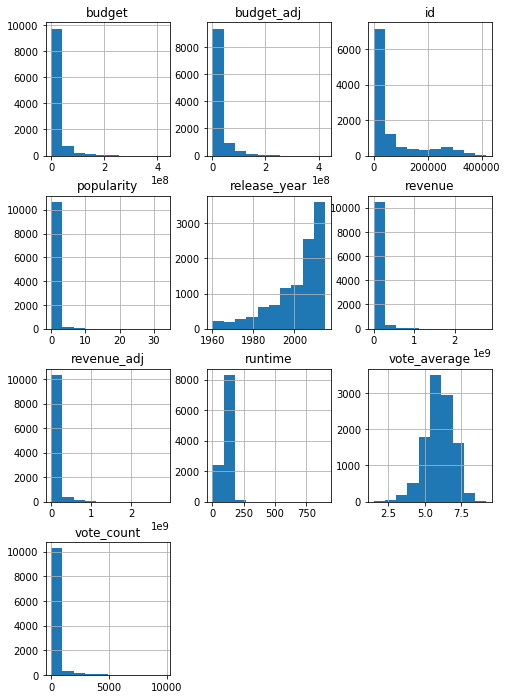

In [5]:
# Exploring the distribution of each column in the dataframe
df.hist(figsize = (8,12));

### Data Cleaning

After looking at the structure of the data, we will clean up our data for the below things:

- Dropping the columns not required in our analysis
- Checking for the null values in all the columns in our dataset
- Dropping or replacing the null values with 'Not Available' depending upon % of null and how valuable the other columns in the same row are
- Dropping duplicate rows if any

In [6]:
# Drop the columns not required
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords','budget','revenue', 'overview'], axis=1, inplace=True)

In [7]:
# Replace null with 'Not Available' because we dont want to drop it
df.fillna('Not Available', inplace=True)

In [8]:
# Drop duplicates which is 1 row in this case
df.drop_duplicates(inplace=True)

In [9]:
# After the data cleaning steps, making sure we have retained all the important columns and have no more nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


#### After we have the cleaned the dataset, we dig deeper into the data records in each column. As part of that, we realize that genre, production_company, and cast has pipe delimited values in one row which will make analyses harder for us. In order for us to be able to analyse these, we will need to seperate these values out.

First we have generated a new column with the number of values each of these column have since this will be helpful in our analyses.

Once we have done that, below are few steps that are performed in order to clean each of these columns:
- Split the multiple values in new columns
- Merge these new columns with the original dataset
- Unpivot these new column values using melt() and add these as additional rows for each movie

Note: As we perform these steps, we need to keep in mind this will increae the number of rows. Therefore, if we melt() all the 3 columns in a single data frame, it will exponentially increase our data set adding unnecessary row duplicates making it hard for us to work with.
In order to prevent this, we will create 3 sub-dataframes one for each genre, production_company, and cast. We will use these from time to time in our analyses below.

We will continue to retain and use our original datasets for places where we do not require deep analyses on these 3 columns.

In [10]:
# Counting the number of genre, production company, and cast each movie has and saving those values in new columns
df['genre_count'] = df.genres.str.split('|').str.len()
df['prod_count'] = df.production_companies.str.split('|').str.len()
df['cast_count'] = df.cast.str.split('|').str.len()

In [11]:
# Create a list after we split the column by pipe
# Create series for the different values after we have split it
# Merge these splitted values to the original dataframe

df_genre_split = df.genres.str.split('|').apply(pd.Series)\
         .merge(df, right_index = True, left_index = True)                                               

In [12]:
# Unpivote the dataframe and insert these values in different rows
# Drop the 'variable' column that is generated as part of melt() since we dont need it
# Drop all NAs introduced as a result of split() and series()
# Creating a new dataframe df_genre with unpivotted values for 'genres'

df_genre = pd.melt(df_genre_split, id_vars = df.columns, value_name = "genre")\
         .drop("variable", axis = 1)\
         .dropna()

In [13]:
# Verify that the records are accurate after we have unpivotted these values
# Sort by id, eye ball the splitted values and compare it with original record
df_genre.sort_values(by=['id'],ascending=False)

# Verify a random example
df_genre[df_genre['original_title'] == 'Jurassic World']

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count,prod_count,cast_count,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,5,5,Action
10865,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,5,5,Adventure
21730,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,5,5,Science Fiction
32595,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,4,5,5,Thriller


In [14]:
# Exploring the structure of df_genre dataframe and notice the increase in number of rows as a result of unpivot
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 54310
Data columns (total 18 columns):
id                      26978 non-null int64
popularity              26978 non-null float64
original_title          26978 non-null object
cast                    26978 non-null object
director                26978 non-null object
runtime                 26978 non-null int64
genres                  26978 non-null object
production_companies    26978 non-null object
release_date            26978 non-null object
vote_count              26978 non-null int64
vote_average            26978 non-null float64
release_year            26978 non-null int64
budget_adj              26978 non-null float64
revenue_adj             26978 non-null float64
genre_count             26978 non-null int64
prod_count              26978 non-null int64
cast_count              26978 non-null int64
genre                   26978 non-null object
dtypes: float64(4), int64(7), object(7)
memory usage: 3.9+ MB


In [15]:
# Our new dataframe helps us identify the total number of genres and type of genres our dataset has
# It has 21 genres which also includes 'Not Available' as one category where genre is missing in original dataset
df_genre['genre'].nunique()

21

In [16]:
# Similar steps are followed to create new dataframes with unpivotted values for 'production_companies'
# Since genre, production_companies, and casts have many to many relationship, we want to re-emphasize
# the reason for not unpivotting all 3 columns in a single dataframe and avoiding exponential explosion of records

df_prod = df.production_companies.str.split('|').apply(pd.Series)\
         .merge(df, right_index = True, left_index = True)\
         .melt(id_vars = df.columns, value_name = "production_company")\
         .drop("variable", axis = 1)\
         .dropna()

# Exploring the structure of df_prod dataframe and notice the increase in number of rows as a result of unpivot
print(df_prod.info())
print(df_prod.head())

#verify result for a random example
#print(df_prod[df_prod['original_title'] == 'Jurassic World'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24255 entries, 0 to 54028
Data columns (total 18 columns):
id                      24255 non-null int64
popularity              24255 non-null float64
original_title          24255 non-null object
cast                    24255 non-null object
director                24255 non-null object
runtime                 24255 non-null int64
genres                  24255 non-null object
production_companies    24255 non-null object
release_date            24255 non-null object
vote_count              24255 non-null int64
vote_average            24255 non-null float64
release_year            24255 non-null int64
budget_adj              24255 non-null float64
revenue_adj             24255 non-null float64
genre_count             24255 non-null int64
prod_count              24255 non-null int64
cast_count              24255 non-null int64
production_company      24255 non-null object
dtypes: float64(4), int64(7), object(7)
memory usage: 3.5+ MB
None

In [17]:
# Similar steps are followed to create new dataframes with unpivotted values for 'cast'
# Since genre, production_companies, and casts have many to many relationship, we want to re-emphasize
# the reason for not unpivotting all 3 columns in a single dataframe and avoiding exponential explosion of records

df_cast = df.cast.str.split('|').apply(pd.Series)\
         .merge(df, right_index = True, left_index = True)\
         .melt(id_vars = df.columns, value_name = "movie_cast")\
         .drop("variable", axis = 1)\
         .dropna()

# Exploring the structure of df_cast dataframe and notice the increase in number of rows as a result of unpivot
print(df_cast.info())
print(df_cast.head())

#verify result for a random example
#print(df_cast[df_cast['original_title'] == 'Jurassic World'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52644 entries, 0 to 54324
Data columns (total 18 columns):
id                      52644 non-null int64
popularity              52644 non-null float64
original_title          52644 non-null object
cast                    52644 non-null object
director                52644 non-null object
runtime                 52644 non-null int64
genres                  52644 non-null object
production_companies    52644 non-null object
release_date            52644 non-null object
vote_count              52644 non-null int64
vote_average            52644 non-null float64
release_year            52644 non-null int64
budget_adj              52644 non-null float64
revenue_adj             52644 non-null float64
genre_count             52644 non-null int64
prod_count              52644 non-null int64
cast_count              52644 non-null int64
movie_cast              52644 non-null object
dtypes: float64(4), int64(7), object(7)
memory usage: 7.6+ MB
None

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have our dataset trimmed and cleaned, we will move to the data exploration steps. We will compute statistics and create visualizations with the goal of addressing the research questions that we have posted in the Introduction section. 

### Research Question 1 
#### What type of movies have typically returned the high revenue?
> For this question, since we are trying to find the characteristics of movies with high revenue, we will be using 'revenue_adj' column as the dependent variable and rest all columns as independent variables.

Note: The reason for using 'revenue_adj' over 'revenue' is to account for inflation over time and prevent any revenue bias

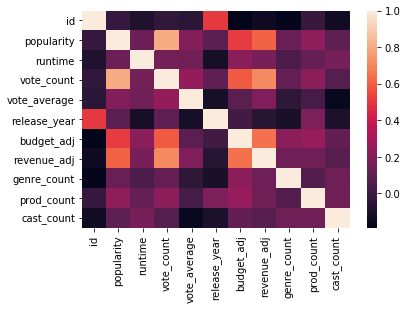

In [18]:
# As a starting step, we would want to see the relationsip of all the columns with revenue_adj
# To explore this relationship, we wil produce a heatmap which will show correlation for all the numeric columns
# The heatmap depicts, revenue_adj has positive corrlation (0.8) with 'popularity', 'vote_count' 
# and 0.6 correlation with 'budget_adj'. It has no correlation with the other columns and also no negative correlation

sns.heatmap(df.corr())

In [19]:
# Decsibing the dataset to see the min, max, and percentile distribution for each numeric field within our dataframe
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_count,prod_count,cast_count
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.483019,2.232398,4.845283
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.116350,1.339340,0.666009
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,2.000000,1.000000,5.000000
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,2.000000,2.000000,5.000000
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,3.000000,3.000000,5.000000
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,5.000000,5.000000,5.000000


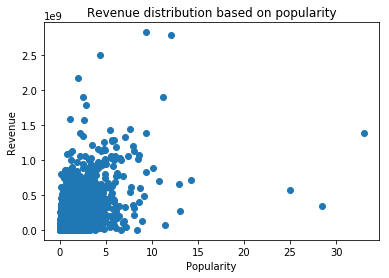

In [21]:
# Plotting 'revenue_adj' against 'popularity' to analyse the positive relationship
# As we see in above table, 75% percent of the popularity values are within the range of 0 to 0.7. This can be 
# seen in the scatter plot with highly concentrated values for popularity close to 0 and how it spreads out towards 5
# with a very limited values with high revenue making the top 25%
# We also observe some outliers with 25 and above popularity

plt.scatter(df['popularity'], df['revenue_adj']);
plt.title('Revenue distribution based on popularity');
plt.xlabel('Popularity');
plt.ylabel('Revenue');

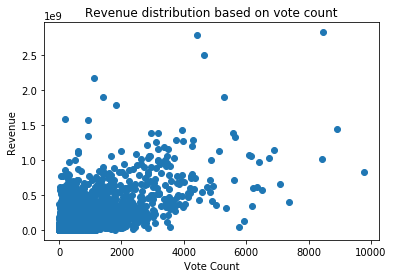

In [22]:
# Plotting 'revenue_adj' against 'vote_count' to analyse the positive relationship
# As we see in above table, 75% percent of the vote_count values are within the range of 10 to 146. This can be 
# seen in the scatter plot with highly concentrated values for vote_count under the 2000 mark and how it 
# spreads out towards 2000 with a limited values with high revenue making the top 25%
# We also observe some outliers with 8000 and above vote counts

plt.scatter(df['vote_count'], df['revenue_adj']);
plt.title('Revenue distribution based on vote count');
plt.xlabel('Vote Count');
plt.ylabel('Revenue');

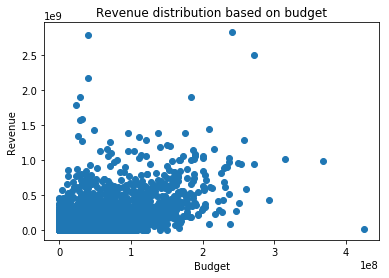

In [23]:
# Plotting 'revenue_adj' against 'budget_adj' to analyse the positive relationship
# As we see in above table, more than 50% of the values have 0 for budget_adj. From 50th-75th% has budget close to 20M.
# This can be seen in the scatter plot with high concentration of values around 0 and spreading as it moves
# towards 100M with smaller number of values having even higher revenue making the top 25%
# We also observe some outliers with 300M and above budget

plt.scatter(df['budget_adj'], df['revenue_adj']);
plt.title('Revenue distribution based on budget');
plt.xlabel('Budget');
plt.ylabel('Revenue');


#### Now that we have seen the relationship of the numeric values with 'revenue_adj', we will see how is it impacted by the categorical columns.
Comparing the categorical columns isn't as direct as numeric. We will now be using the new dataframes that we had created in the previous section and see how if at all genre, casts, director, and production companies impacts the revenue.

#### Revenue against Genre

Text(0, 0.5, 'Revenue')

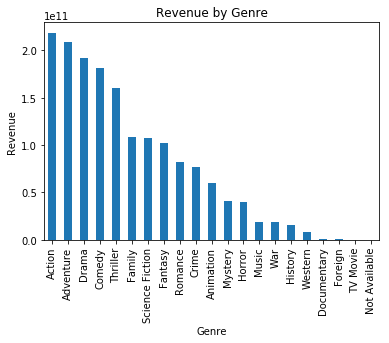

In [33]:
# Plotting the total revenue returned by each genre reveals that max revenue has been returned by Action movies
# very closely followed by Adventure and Drama

df_genre.groupby('genre')['revenue_adj'].sum().sort_values(ascending=False).\
    plot(kind='bar', title='Revenue by Genre');
plt.xlabel('Genre')
plt.ylabel('Revenue')

In [23]:
# Percent of revenue returned by each genre
(df_genre.groupby('genre')['revenue_adj'].sum().sort_values(ascending=False))*100/df_genre['revenue_adj'].sum()

genre
Action             13.328067
Adventure          12.697619
Drama              11.721635
Comedy             11.068961
Thriller            9.792119
Family              6.580442
Science Fiction     6.512970
Fantasy             6.207966
Romance             5.027690
Crime               4.672293
Animation           3.630935
Mystery             2.511465
Horror              2.401982
Music               1.159799
War                 1.151307
History             0.975749
Western             0.463460
Documentary         0.071546
Foreign             0.020438
TV Movie            0.003558
Not Available       0.000000
Name: revenue_adj, dtype: float64

In [24]:
# Since we have the genres that have the highest revenue, we want to compare the number of movies in these categories
# to make sure its not just because we had the maximum number of Action movies.
# We see that 22% of Action movies have returned more revenue than 44% of Drama or 35% of Comedy movies. 
# Adventure which is only 13% has returned the second highest revenue.

df_genre['genre'].value_counts()*100/df['id'].count()

Drama              43.810400
Comedy             34.910262
Thriller           26.755637
Action             21.942016
Romance            15.757018
Horror             15.066728
Adventure          13.538886
Crime              12.462034
Family             11.329959
Science Fiction    11.311551
Fantasy             8.430741
Mystery             7.455131
Animation           6.433502
Documentary         4.786010
Music               3.755177
History             3.074091
War                 2.485044
Foreign             1.730327
TV Movie            1.537046
Western             1.518638
Not Available       0.211689
Name: genre, dtype: float64

#### Revenue against Production Companies 

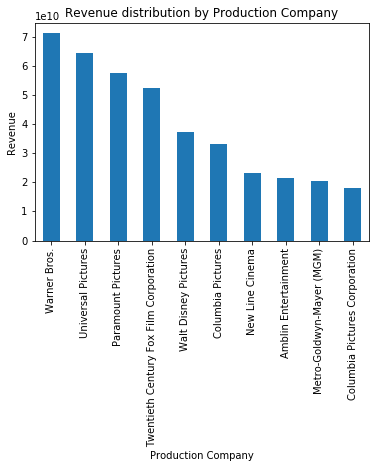

In [40]:
# Plotting the total revenue by each production_company reveals that max revenue has been returned by Warner Bros.,
# very closely followed by Universal, and Paramount Pictures

df_prod.groupby('production_company')['revenue_adj'].sum().nlargest(10, keep='first').plot(kind='bar');
plt.title('Revenue distribution by Production Company');
plt.xlabel('Production Company');
plt.ylabel('Revenue');

In [26]:
# Since we have the production companies that have the highest revenue, we want to compare the number of movies
# these companies have produced to make sure its not just because Warner Bros. produced to maximum number of movie.
# We saw that although Universal has produced the max number of movies but Warner returned the highest revenue

df_prod['production_company'].value_counts()*100/df['id'].count()

Not Available                                           9.479982
Universal Pictures                                      4.804418
Warner Bros.                                            4.684768
Paramount Pictures                                      3.966866
Twentieth Century Fox Film Corporation                  2.595490
Columbia Pictures                                       2.503451
New Line Cinema                                         2.015647
Metro-Goldwyn-Mayer (MGM)                               2.006443
Walt Disney Pictures                                    1.969627
Touchstone Pictures                                     1.638288
Columbia Pictures Corporation                           1.472618
TriStar Pictures                                        1.352968
Miramax Films                                           1.279337
Relativity Media                                        0.994017
Regency Enterprises                                     0.874367
Canal+                   

#### Revenue against Casts

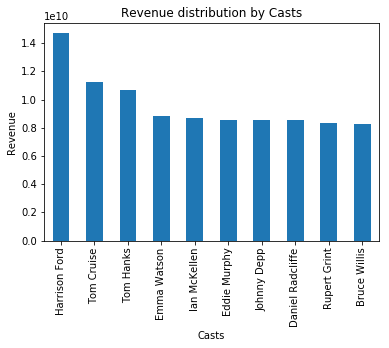

In [41]:
# Plotting the total revenue by each cast reveals that max revenue has been returned by movies having Harrison Ford,
# followed by Tom Cruise, and Tom Hanks

df_cast.groupby('movie_cast')['revenue_adj'].sum().nlargest(10, keep='first').plot(kind='bar');
plt.title('Revenue distribution by Casts');
plt.xlabel('Casts');
plt.ylabel('Revenue');

In [28]:
# Since we have the casts that have the highest revenue, we want to compare the number of movies these actors 
# have been in to make sure its not just because Harrison Ford, Tom Cruise were in the maximum number of movie.
# We saw that although Harrison Ford, Tom Cruise, and Tom Hanks are not even in the top 10 list below

df_cast['movie_cast'].value_counts()*100/df['id'].count()

Not Available             0.699494
Robert De Niro            0.662678
Samuel L. Jackson         0.653474
Bruce Willis              0.570640
Nicolas Cage              0.561436
Michael Caine             0.487805
Robin Williams            0.469397
John Cusack               0.460193
John Goodman              0.450989
Morgan Freeman            0.450989
Susan Sarandon            0.441786
Liam Neeson               0.441786
Julianne Moore            0.432582
Alec Baldwin              0.432582
Tom Hanks                 0.423378
Johnny Depp               0.423378
Gene Hackman              0.423378
Christopher Walken        0.423378
Willem Dafoe              0.414174
Dennis Quaid              0.414174
Sylvester Stallone        0.414174
Ed Harris                 0.404970
Donald Sutherland         0.404970
Clint Eastwood            0.404970
Meryl Streep              0.404970
Woody Harrelson           0.395766
Ewan McGregor             0.395766
Robert Downey Jr.         0.395766
Antonio Banderas    

#### Revenue against Directors

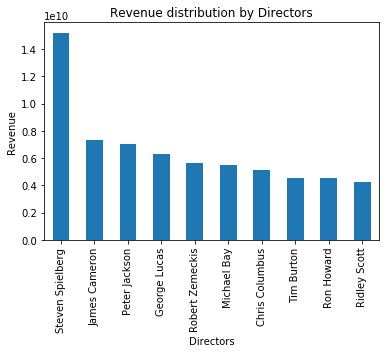

In [42]:
# Plotting the total revenue by each director reveals that max revenue has been returned by movies directed by
# Steven Spielberg with James Cameron been second on the list with half of total revenue from Steven's movies|

df.groupby('director')['revenue_adj'].sum().nlargest(10, keep='first').plot(kind='bar');
plt.title('Revenue distribution by Directors');
plt.xlabel('Directors');
plt.ylabel('Revenue');

In [30]:
# Since we have the directors that have the highest revenue, we want to compare the number of movies directed by them 
# in order to make sure its not just because Steven Spielberg directed the maximum number of movies.
# We see that Steven Spielberg has only produced 2% of the movies with Woody Allen leading the list

df['director'].value_counts()*100/df['id'].count()

Woody Allen                                    0.414174
Not Available                                  0.404970
Clint Eastwood                                 0.312931
Steven Spielberg                               0.266912
Martin Scorsese                                0.266912
Ridley Scott                                   0.211689
Ron Howard                                     0.202485
Steven Soderbergh                              0.202485
Joel Schumacher                                0.193281
Brian De Palma                                 0.184077
Tim Burton                                     0.174873
Wes Craven                                     0.174873
Barry Levinson                                 0.174873
John Carpenter                                 0.165670
Rob Reiner                                     0.165670
Mike Nichols                                   0.165670
David Cronenberg                               0.165670
Sidney Lumet                                   0

### Research Question 2  
#### What type of movies have high ratings?
> For this question, since we are trying to find the characteristics of movies with high rating, we will be using 'vote_average' column as the dependent variable and rest all columns as independent variables.

Note: From the heatmap under Question 1, we were able to conclude no correlation between revenue_adj and vote_average. Taking a setp further we will see what kind of movies people vote high and actually enjoy!

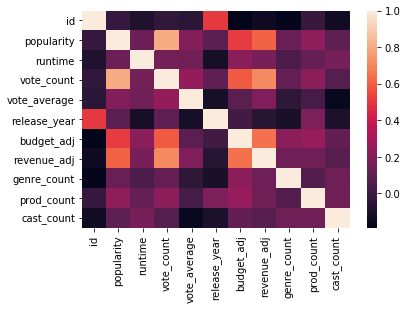

In [31]:
# As a starting step, we would want to see the relationsip of all the columns with vote_average
# To explore this relationship, we wil produce a heat map which will show correlation for all the numeric columns
# The heatmap depicts, vote_average has no strong corrlation with any of these data fields

sns.heatmap(df.corr())

#### Now that we have seen 'vote_average' has no relationship with any of the numeric values, we will see if it is impacted by the categorical columns.
For this part of analyses, we will again be using the new dataframes that we had created in Data Wrangling section and see how if at all genre, casts, director, and production companies impacts the rating.

We would first define what do we consider as 'high' rating. For our project, any movie having rating greater than the mean vote_average will be considered having a high rating.

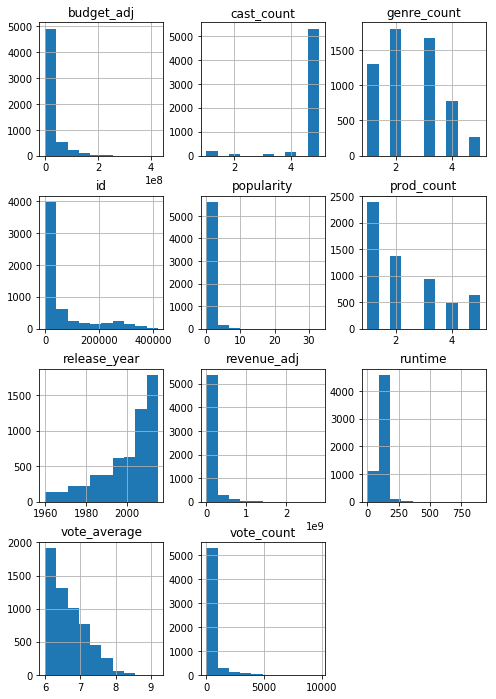

In [32]:
# Looking at distribution of different columns for vote_average greater than mean
 
df.query("vote_average >= vote_average.mean()").hist(figsize=(8,12));

#### Vote Count against Genre

In [33]:
# On an average almost all the genres have a similar range for rating i.e. between 5-7
# Although we see 'Documentary' having the highest average followed by 'Music' but since the averages are very close,
# it is hard to conclude much from this insight.

df_genre.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

genre
Documentary        6.908462
Music              6.480392
Not Available      6.421739
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165546
Crime              6.124889
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787752
Thriller           5.750671
Science Fiction    5.665582
Horror             5.337447
Name: vote_average, dtype: float64

##### As an alternative to the above step, we would like to see how many high rated movies do we have under each genre, production company, casts, and director

In [34]:
# First lets see how many total high rated movies do we have in the dataset
high_rated_movies = df.query("vote_average >= vote_average.mean()")['id'].count()
high_rated_movies

5810

In [35]:
# We will also calculate the total number of movies we have within each genre
# Since most of the movies have more than 1 genre, total below will not equal the count of unique ids
genre_total_movies = df_genre.groupby('genre')['id'].count().sort_values(ascending=False)
genre_total_movies

genre
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Not Available        23
Name: id, dtype: int64

In [36]:
# Calculate the total high rated movies we have within each genre
genre_high_rated = df_genre.query("vote_average >= vote_average.mean()")['genre'].value_counts()
genre_high_rated

Drama              2982
Comedy             1865
Thriller           1291
Action             1109
Romance             977
Crime               820
Adventure           771
Family              657
Science Fiction     527
Animation           513
Documentary         465
Horror              451
Fantasy             445
Mystery             429
Music               299
History             257
War                 183
Foreign             103
Western             100
TV Movie             77
Not Available        15
Name: genre, dtype: int64

#### Looking at the above numbers alone might not add much value unless we plot their distribution against the total number of high movies and total number of movies within each genre

In [37]:
# Calculating the distribution of high rated movies within each genre as a percent of total high rated movies
(genre_high_rated*100/high_rated_movies)

Drama              51.325301
Comedy             32.099828
Thriller           22.220310
Action             19.087780
Romance            16.815835
Crime              14.113597
Adventure          13.270224
Family             11.308090
Science Fiction     9.070568
Animation           8.829604
Documentary         8.003442
Horror              7.762478
Fantasy             7.659208
Mystery             7.383821
Music               5.146299
History             4.423408
War                 3.149742
Foreign             1.772806
Western             1.721170
TV Movie            1.325301
Not Available       0.258176
Name: genre, dtype: float64

In [38]:
# Calculating the distribution of high rated movies within each genre as a percent of total movies in that genre
(genre_high_rated*100/genre_total_movies).sort_values(ascending=False)

Documentary        89.423077
History            76.946108
Animation          73.390558
Music              73.284314
War                67.777778
Not Available      65.217391
Drama              62.647059
Western            60.606061
Crime              60.561300
Romance            57.067757
Foreign            54.787234
Family             53.371243
Mystery            52.962963
Adventure          52.413324
Comedy             49.169523
Fantasy            48.580786
Action             46.518456
TV Movie           46.107784
Thriller           44.410045
Science Fiction    42.880391
Horror             27.550397
dtype: float64

##### From the analyses above, we see that although Drama has the highest number of high rated movies significantly more than any other genre, it is also because it has the highest number of movies in total (51%). In real, 62% of the total Drama movies are high rated. Similar is the case with Comedy, Thriller, and Action with 49%, 47%, and 45% high rated movies of their totals respectively.

##### If we just consider the percent of high rated movies as a percent of total movies within that genre, Documentary (which is 8% of the total movies) leads the list with ~90%, followed by  History 77%, and Animation 73% (which is only 5% and 9% of the total produced movies).


#### Vote Count against Production Companies

In [39]:
# Calculate the total number of movies for the top 10 production companies
tot_top_10 = df_prod['production_company'].value_counts().nlargest(10, keep='first')
tot_top_10

Not Available                             1030
Universal Pictures                         522
Warner Bros.                               509
Paramount Pictures                         431
Twentieth Century Fox Film Corporation     282
Columbia Pictures                          272
New Line Cinema                            219
Metro-Goldwyn-Mayer (MGM)                  218
Walt Disney Pictures                       214
Touchstone Pictures                        178
Name: production_company, dtype: int64

In [40]:
# Calculate the total high rated movies for the top 10 production companies
prod_high_rated = df_prod.query("vote_average >= vote_average.mean()")['production_company'].\
                value_counts().nlargest(10, keep='first')
prod_high_rated

Not Available                             573
Warner Bros.                              307
Universal Pictures                        302
Paramount Pictures                        266
Twentieth Century Fox Film Corporation    166
Columbia Pictures                         148
Walt Disney Pictures                      129
Metro-Goldwyn-Mayer (MGM)                 125
New Line Cinema                           115
Touchstone Pictures                       103
Name: production_company, dtype: int64

In [41]:
# percent of high rated as a percent of total movies produced by that production company
(prod_high_rated*100/tot_top_10).sort_values(ascending=False)

Paramount Pictures                        61.716937
Warner Bros.                              60.314342
Walt Disney Pictures                      60.280374
Twentieth Century Fox Film Corporation    58.865248
Touchstone Pictures                       57.865169
Universal Pictures                        57.854406
Metro-Goldwyn-Mayer (MGM)                 57.339450
Not Available                             55.631068
Columbia Pictures                         54.411765
New Line Cinema                           52.511416
Name: production_company, dtype: float64

In [42]:
# Calculate distribution of high rated movies within each production company as a percent of total high rated movies
(prod_high_rated*100/high_rated_movies).nlargest(10, keep='first')
#.plot(kind='bar', figsize=(12,4));

Not Available                             9.862306
Warner Bros.                              5.283993
Universal Pictures                        5.197935
Paramount Pictures                        4.578313
Twentieth Century Fox Film Corporation    2.857143
Columbia Pictures                         2.547332
Walt Disney Pictures                      2.220310
Metro-Goldwyn-Mayer (MGM)                 2.151463
New Line Cinema                           1.979346
Touchstone Pictures                       1.772806
Name: production_company, dtype: float64

##### From the analyses above, we see that the top 10 prodcution companies have ~55%-60% of the produced movies as high rated. Warner Bros., Universal, and Paramount are the top 3 production companies in terms of the highest number of total with all three having ~60% of their produced movies as highly rated. These 3 production companies together make ~20% of the total highly rated movies and  top 10 contributing to 40% of the total highly rated movies.

#### Vote Count against Casts

In [43]:
# Calculate the total number of movies for the top 10 casts
cast_top_10 = df_cast['movie_cast'].value_counts().nlargest(10, keep='first')
cast_top_10

Not Available        76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Name: movie_cast, dtype: int64

In [44]:
# Calculate the total high rated movies for the top 10 casts
cast_high_rated = df_cast.query("vote_average >= vote_average.mean()")['movie_cast'].\
                value_counts().nlargest(10, keep='first')
cast_high_rated

Not Available        66
Robert De Niro       49
Johnny Depp          36
Samuel L. Jackson    36
Meryl Streep         36
Michael Caine        36
Gene Hackman         34
Denzel Washington    34
Brad Pitt            34
Tom Hanks            34
Name: movie_cast, dtype: int64

In [45]:
(cast_high_rated*100/cast_top_10).sort_values(ascending=False)

Not Available        86.842105
Robert De Niro       68.055556
Michael Caine        67.924528
Samuel L. Jackson    50.704225
Brad Pitt                  NaN
Bruce Willis               NaN
Denzel Washington          NaN
Gene Hackman               NaN
John Cusack                NaN
John Goodman               NaN
Johnny Depp                NaN
Meryl Streep               NaN
Morgan Freeman             NaN
Nicolas Cage               NaN
Robin Williams             NaN
Tom Hanks                  NaN
Name: movie_cast, dtype: float64

##### From the analyses above, we see that there are only 3 actors who make it to the top 10 total and top 10 high rated movie list. Robert De Niro leading the list with highest number of movies and ~70% of those being rated high. Followed by Michael Caine who is in the top 5 for highest number of movies and also has 70% of those as high rated. Samuel L. Jackson who has the 2nd highest total number of movies has 50% of those as high rated.

#### Vote Count against Directors

In [46]:
# Calculate the total number of movies for the top 10 directors
dir_top_10 = df['director'].value_counts().nlargest(10, keep='first')
dir_top_10

Woody Allen          45
Not Available        44
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Name: director, dtype: int64

In [47]:
# Calculate the total high rated movies for the top 10 directors
dir_high_rated = df.query("vote_average >= vote_average.mean()")['director'].\
                value_counts().nlargest(10, keep='first')
dir_high_rated

Not Available        37
Woody Allen          35
Martin Scorsese      26
Clint Eastwood       26
Steven Spielberg     25
Ridley Scott         19
Ron Howard           18
Steven Soderbergh    16
Tim Burton           16
Tyler Perry          16
Name: director, dtype: int64

In [48]:
(dir_high_rated*100/dir_top_10).sort_values(ascending=False)

Martin Scorsese      89.655172
Steven Spielberg     86.206897
Not Available        84.090909
Ridley Scott         82.608696
Ron Howard           81.818182
Woody Allen          77.777778
Clint Eastwood       76.470588
Steven Soderbergh    72.727273
Brian De Palma             NaN
Joel Schumacher            NaN
Tim Burton                 NaN
Tyler Perry                NaN
Name: director, dtype: float64

##### From the above analyses, we see that Woody Allen leads the list with highest number of total directed movies with ~78% of those being high rated. Martin Scorsese and Steven Spielberg who also are in the top 5 list of total movies directed have more than 85% of those movies as high rated. Closely being followed by Clint Eastwood and Ridley Soctt who are in the top 5 and have ~80% of their movies as high rated. 
 

### Research Question 3  
#### How has the trend for number of movie released and movie popularity changed over years?
> For this question, since we are trying to find the trend, we will be using 'popularity', and 'genre' as the dependent variable and 'release_year' as independent variables.

#### Trend for number of movies relased over years

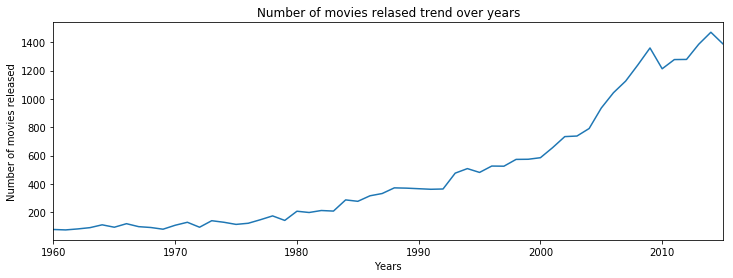

In [43]:
# Looking at the total number of movies released every year over the last 55 years
df_genre.groupby('release_year')['id'].count().plot(kind='line',figsize=(12,4));
plt.title('Number of movies released trend over years');
plt.xlabel('Years');
plt.ylabel('Number of movies released');

##### On an yearly basis, we see that there might be few dips and peaks but the overall number of released movies trend over years has tremedously increased from 1960 to 2015. One significant dip is seen in 2009 which can be related to the 2008 market crash impacting the whole economy including movie industry.

In [45]:
# Looking at the trend of number of movies produced in the top 3 genres over years
# Finding the number of movies in Drama, Comedy and Action grouped by release year

drama_trend = df_genre[df_genre['genre']=='Drama'].groupby('release_year')['id'].count()
comedy_trend = df_genre[df_genre['genre']=='Comedy'].groupby('release_year')['id'].count()
action_trend = df_genre[df_genre['genre']=='Action'].groupby('release_year')['id'].count()
#.plot(kind='bar', figsize=(12,4));

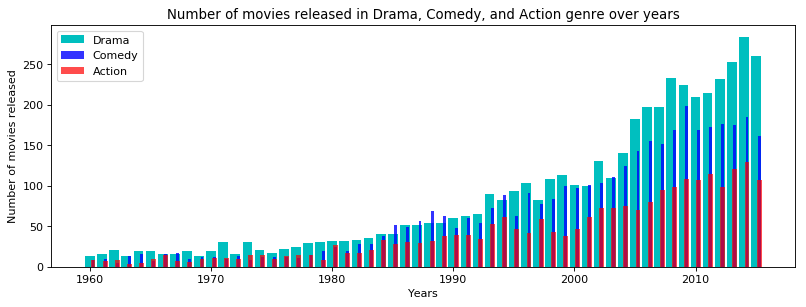

In [47]:
# Potting the overlapping bars for the 3 genres and using figure to fit the size

figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

width = 0.8
plt.bar(drama_trend.index, drama_trend, width=width, color='c', label='Drama');
plt.bar(drama_trend.index+0.25, comedy_trend, width=0.3*width, color='b', alpha=0.8, label='Comedy')
plt.bar(drama_trend.index+0.25, action_trend, width=0.5*width, color='r', alpha=0.7, label='Action')

plt.title('Number of movies released in Drama, Comedy, and Action genre over years');
plt.xlabel('Years');
plt.ylabel('Number of movies released');

plt.legend()
plt.show()

##### As the number of movies over year increases, we see the number of movies in the top 3 genres 'Drama', 'Comedy', 'Action'  also increases

#### Movie popularity trend over years

In [49]:
# We also plot the highest popularity average for every genre for the last 55 years to see how the demand of movies 
# has changed overtime
# To do this, first we too the average of popularity for every year and genre
# Then took the max popularity for every year to see which genre was the most popular in that year
# Merging both the datasets to have evrything in merge_df

year_genre_pop = df_genre.groupby(by = ['release_year','genre'], as_index = False)['popularity'].mean()
year_max_pop = year_genre_pop.groupby('release_year', as_index = False)['popularity'].max()
year_max_pop.rename(columns={'popularity':'popularity_max'}, inplace=True)
merge_df= pd.merge(year_genre_pop, year_max_pop, how='right', on=['release_year'])

merge_df_unique = merge_df.query('popularity_max == popularity')

In [50]:
merge_df_unique.head(60)
#merge_df[merge_df['genre']=='Drama']

,release_year,genre,popularity,popularity_max
13,1960,Thriller,0.811910,0.811910
18,1961,Animation,2.631987,2.631987
34,1962,Adventure,0.942513,0.942513
52,1963,Animation,2.180410,2.180410
83,1964,War,0.930959,0.930959
95,1965,Music,0.968850,0.968850
105,1966,Animation,0.585717,0.585717
123,1967,Animation,1.348805,1.348805
149,1968,Mystery,1.519456,1.519456
159,1969,Crime,0.948020,0.948020


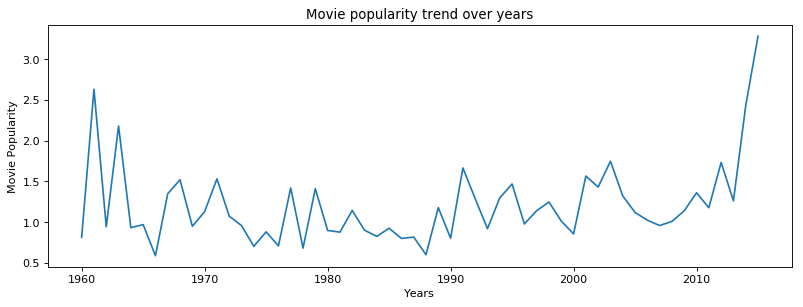

In [51]:
# Using merge_df to plot the highest avg. genre popularity by year
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(merge_df_unique['release_year'], merge_df_unique['popularity_max']);
plt.title('Movie popularity trend over years');
plt.xlabel('Years');
plt.ylabel('Movie Popularity');

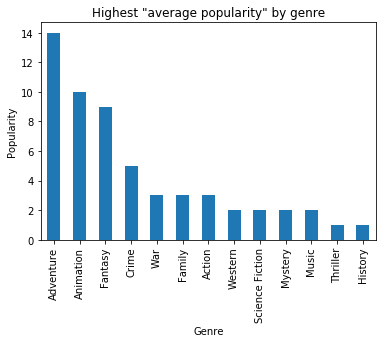

In [54]:
# Adventure has the highest popularity the maximum number of times (14) over years followed by Animation (10) times
merge_df_unique.groupby('genre')['release_year'].count().sort_values(ascending=False).plot(kind = 'bar');
plt.title('Highest "average popularity" by genre');
plt.xlabel('Genre');
plt.ylabel('Popularity');

##### We see a very high popularity for movies in the begining 1961 after which it drops and follows many dips and peaks with hightest popularity for movies being in 2015. As seen above, the most popular genre over years has been Adventure and Animation. We also aligns with our analyses in Question1 , where we saw Adventure returned the 2nd highest revenue even with ~13% of the total movies and has ~53% of high rated movies In as seen in Question 2. Further digging into 'Adventure' also shows that on an average it has very high number of vote counts which aligns with our analyses since it is a quite popular genre, more people have watched and rated these movies. 

<a id='conclusions'></a>
## Conclusions

### From our analyses on the TMDb dataset, we have few conclusions which have been listed below:

#### Revenue related conclusions
- High revenue has been returned on movies which usually had high budget, popularity, vote_count. If we think about it, it makes sense since more the budget, more can be spend on movie promotions and can reach more people who would rate the movie. High budget also means they can afford to have a more expensive and high cast making the movie more desirable for people to watch.

- The highest revenue has been returned by Action followed by Adventure movies (together making 26% of total revenue) which individually has less than the number of total movies produced under 'Drama' viz. Drama 44% vs Action 22% and Adventure 13%.

#### Movie rating related conclusions
- More than 53% of the total movies have a high rating in which Documentary genre has the highest vote average of 6.9. Number of Documentary movies produced are very less compared to the other popular genres (only 8% in our dataset) but 90% of these Documentary are rated high. On the otehr hand, Drama, Comedy, Action, Thriller are the most produced genres and all of these genres also have more than 50% of the movies rated high.

- We have been able to list down the top 10 production companies, directors, and cast that have historically returned the hightest revenue and also has given the high rated movies. This can be leveraged for the success of future movies.

    - Movie rating seems to be higher for the Directors with highest number of movies directed e.g. Woody Allen, Martin Scorsese, Steven Spielberg, Clint Eastwood, and Ridley Soctt were in the top 5 list of movies directed and all of them had  ~80% of the movies rated high.

    - Robert De Niro, Michael Caine, and Samuel L. Jackson are the only 3 actors who made it to the top 10 list of number of total movies acted in and number of high rated movies out of those (50% and higher).

    - Warner Bros., Universal, and Paramount emerged as the top 3 production companies in terms of revenue returned,  total movies produced, and the highest number of movies produced (with each having ~60% of their produced movies as high rated). Walt Disney which was 5th on the list of revenue returned was apparently 2nd on the list of high rated movies with 2.5x less movies produced by Warner Bros.

#### Movie genre, and popularity yearly trend conclusions
- While watching the yearly trend, irrespective of the few dips and peaks the overall number of released movies continue to increase tremedously from 78 movies in 1960 to 1388 in 2015 (growth of 1600%). One significant dip is seen in 2009 which can be related to the 2008 market crash impacting the whole economy including the movie industry. As the number of movies increases over years, we see an equal amount of increased number of movies (growth of 1500-1900%) for the top 3 produced genres 'Drama', 'Comedy', 'Action'.

- In the yearly trend, we also noticed a trend for movie popularity which was high in the begining in 1961 following a drop and then after few dips and peaks was the highest in 2015. The most popular genre over years has been Adventure which aligns with our conclusion from Question 1 and 2 where Adventure returned the 2nd highest revenue even with just ~13% of the total movies and had ~53% of those rated high rated movies.

### Sources
> Few weblinks used in addition to the course lecture

- https://stackoverflow.com/questions/38345213/using-value-counts-in-pandas-with-condtions
- https://stackoverflow.com/questions/41571591/count-the-number-of-elements-in-a-string-separated-by-comma
- https://mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas-9849d8ff2401
- https://www.geeksforgeeks.org/python-pandas-melt/
- https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
- https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib